# Task-5

## SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('E:/datasets/social_network/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split #splitting into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train[:3])

[[    44  39000]
 [    32 120000]
 [    38  50000]]


In [5]:
print(y_train[:3])

[0 1 0]


In [6]:
print(X_test[:3])

[[   30 87000]
 [   38 50000]
 [   35 75000]]


In [7]:
print(y_test[:3])

[0 0 0]


In [8]:
from sklearn.preprocessing import StandardScaler #scaling features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]


In [10]:
print(X_test[:3])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]]


In [11]:
# training SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [12]:
#predcting a value
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [13]:
y_pred = classifier.predict(X_test) #predicitng x_test values

In [14]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [15]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum())) #mislabelled points

Number of mislabeled points out of a total 100 points : 10


In [16]:
from sklearn.metrics import confusion_matrix #TP, TN, FP, FN confusion matrix
print("Confusion matrix")
confusion_matrix(y_test, y_pred)

Confusion matrix


array([[66,  2],
       [ 8, 24]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score #Accuracy
print("Accuracy: ", end="")
print(accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 90.0 %


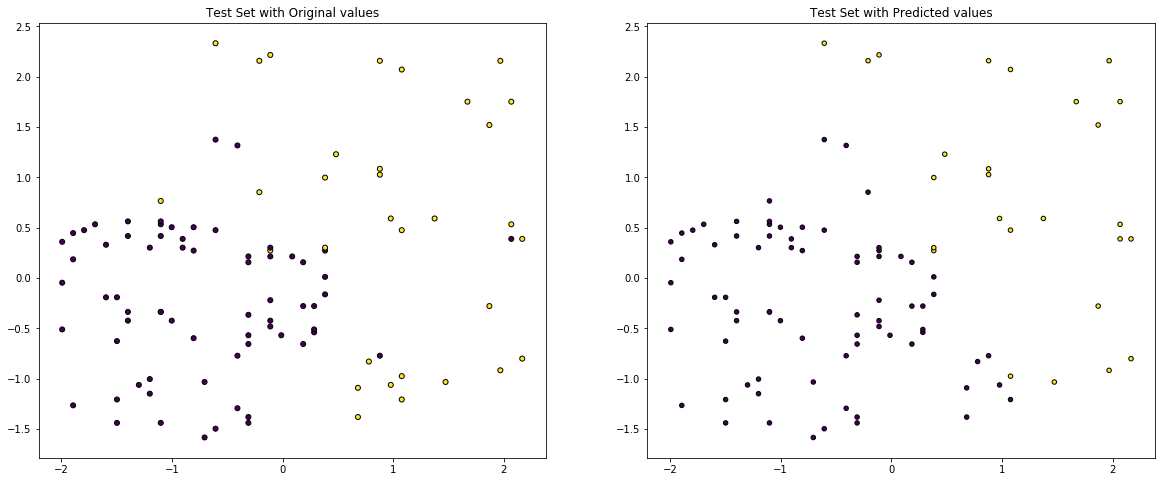

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title("Test Set with Original values")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=25, edgecolor='k')

plt.subplot(122)
plt.title("Test Set with Predicted values")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_pred, s=20, edgecolor='k')
plt.show()
